## Importing Libraries and Data

In [3]:
import pandas as pd

In [4]:
df_trip = pd.read_csv('/home/jabez/Documents/week_8/Logistic-optimization-Delivery-drivers-location-optimisation-with-Causal-Inference-/data/nb.csv')
df_locations = pd.read_csv('/home/jabez/Documents/week_8/Logistic-optimization-Delivery-drivers-location-optimisation-with-Causal-Inference-/data/driver_locations_during_request.csv')


# EDA Analysis

### Overview

In [5]:
df_trip

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...,...,...,...
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28


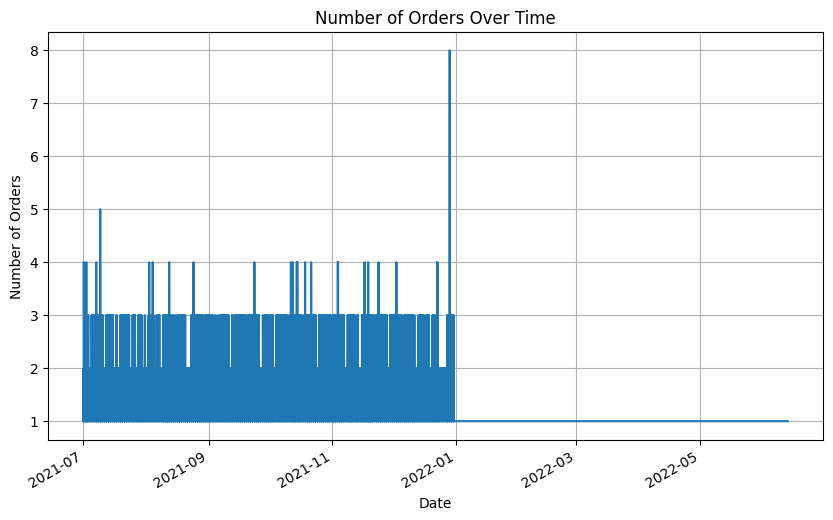

In [9]:
import matplotlib.pyplot as plt
df_trip['Trip Start Time'] = pd.to_datetime(df_trip['Trip Start Time'])

# Group by date and count orders
orders_over_time = df_trip.groupby('Trip Start Time').size()

# Plot
plt.figure(figsize=(10, 6))
orders_over_time.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [6]:
df_locations

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
...,...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,NaN,NaN
1557736,1557737,517948,245447,rejected,6.425431,3.527358,NaN,NaN
1557737,1557738,517948,239866,rejected,6.440013,3.525378,NaN,NaN
1557738,1557739,517948,243774,rejected,6.469036,3.566877,NaN,NaN


### Spliting column for to use the columns to add features

In [80]:
df_org = df_trip['Trip Origin'].str.split(',', expand=True)
df_org.columns = ['lat_org', 'lon_org']


# Combining the new columns with the original DataFrame
df_trip = pd.concat([df_trip, df_org], axis=1)
df_trip = df_trip.drop('Trip Origin', axis=1)

df_des = df_trip['Trip Destination'].str.split(',', expand=True)
df_des.columns = ['lat_des', 'lon_des']


# # Combining the new columns with the original DataFrame
df_trip = pd.concat([df_trip, df_des], axis=1)
df_trip = df_trip.drop('Trip Destination', axis=1)


df_start = df_trip['Trip Start Time'].str.split(' ', expand=True)
df_start.columns = ['Start_date', 'Start_time']


# Combining the new columns with the original DataFrame
df_trip = pd.concat([df_trip, df_start], axis=1)
df_trip = df_trip.drop('Trip Start Time', axis=1)

df_end = df_trip['Trip End Time'].str.split(' ', expand=True)
df_end.columns = ['End_date', 'End_time']

# Combining the new columns with the original DataFrame
df_trip = pd.concat([df_trip, df_end], axis=1)
df_trip = df_trip.drop('Trip End Time', axis=1)


date= df_trip['Start_date'].str.split('-', expand=True)
date.columns = ['st_year', 'st_month', 'st_date']
df_trip = pd.concat([df_trip, date], axis=1)
df_trip = df_trip.drop('Start_date', axis=1)


df_trip['lat_org'] = df_trip['lat_org'].astype(float)
df_trip['lon_org'] = df_trip['lon_org'].astype(float)
df_trip['lat_des'] = df_trip['lat_des'].astype(float)
df_trip['lon_des'] = df_trip['lon_des'].astype(float)



In [81]:
df_trip

,Trip ID,lat_org,lon_org,lat_des,lon_des,Start_time,End_date,End_time,st_year,st_month,st_date
0,391996,6.508813,3.377403,6.650970,3.345031,07:28:04,2021-07-01,07:29:37,2021,07,01
1,391997,6.431671,3.455538,6.428081,3.472189,06:38:04,2021-07-01,07:07:28,2021,07,01
2,391998,6.631679,3.338898,6.508324,3.359040,06:21:02,2021-07-01,07:02:23,2021,07,01
3,391999,6.572757,3.367708,6.584881,3.361407,07:16:07,2021-07-01,07:29:42,2021,07,01
4,392001,6.601042,3.276634,6.450107,3.391615,09:30:59,2021-07-01,09:34:36,2021,07,01
...,...,...,...,...,...,...,...,...,...,...,...
536015,1637696,6.448218,3.477208,6.437787,3.481670,20:35:06,2021-12-30,21:02:59,2021,12,30
536016,1637702,6.442321,3.473687,6.436589,3.555974,20:48:13,2021-12-30,21:43:49,2021,12,30
536017,1637704,6.428198,3.492248,6.448089,3.477575,20:51:45,2021-12-30,21:41:32,2021,12,30
536018,1637705,6.586930,3.363297,6.637907,3.333951,20:48:50,2021-12-30,21:08:28,2021,12,30


## Dealing with Missing Values

In [82]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Trip ID     536020 non-null  int64  
 1   lat_org     536020 non-null  float64
 2   lon_org     536020 non-null  float64
 3   lat_des     536020 non-null  float64
 4   lon_des     536020 non-null  float64
 5   Start_time  534369 non-null  object 
 6   End_date    536019 non-null  object 
 7   End_time    536019 non-null  object 
 8   st_year     534369 non-null  object 
 9   st_month    534369 non-null  object 
 10  st_date     534369 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 45.0+ MB


In [83]:
df_trip.isnull().sum()

Trip ID          0
lat_org          0
lon_org          0
lat_des          0
lon_des          0
Start_time    1651
End_date         1
End_time         1
st_year       1651
st_month      1651
st_date       1651
dtype: int64

### Calculating missing persentage before dropping the rows and setting threshold at 5%

In [84]:
threshold = 0.05  # Example threshold of 5%
missing_percentage = df_trip.isnull().mean().mean()

if missing_percentage < threshold:
    df_trip = df_trip.dropna()
else:
    
    pass

In [85]:
df_trip.isnull().sum()

Trip ID       0
lat_org       0
lon_org       0
lat_des       0
lon_des       0
Start_time    0
End_date      0
End_time      0
st_year       0
st_month      0
st_date       0
dtype: int64

In [10]:
df_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [11]:
df_locations.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

In [96]:
df_locations=df_locations.drop(columns=['created_at', 'updated_at'])

## Dealing with outliers

In [16]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [15]:
df_trip = df_trip.drop('lon', axis=1)


In [131]:
df_trip.describe()

,Trip ID
count,5.343680e+05
mean,9.900856e+05
std,3.454114e+05
min,3.919960e+05
25%,6.929775e+05
50%,9.898045e+05
75%,1.279707e+06
max,1.637709e+06


In [50]:
df_trip = pd.concat([df_trip, date], axis=1)
df_trip = df_trip.drop('Start_date', axis=1)

In [51]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534368 entries, 0 to 536019
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Trip ID     534368 non-null  int64  
 1   lat_org     534368 non-null  float64
 2   lon_org     534368 non-null  float64
 3   lat_des     534368 non-null  float64
 4   lon_des     534368 non-null  float64
 5   Start_date  534368 non-null  object 
 6   Start_time  534368 non-null  object 
 7   End_date    534368 non-null  object 
 8   End_time    534368 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 40.8+ MB


In [93]:
df_locations['']

,id,order_id,driver_id,driver_action,lat,lng
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784
3,4,392001,243539,rejected,6.596142,3.280526
4,5,392001,171653,rejected,6.609232,3.288800
...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877
1557736,1557737,517948,245447,rejected,6.425431,3.527358
1557737,1557738,517948,239866,rejected,6.440013,3.525378
1557738,1557739,517948,243774,rejected,6.469036,3.566877
